# Notebook 02: Exploratory Data Analysis

This notebook explores the data cleaned in [Notebook 1: Data Cleaning](01_data_cleaning.ipynb).

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df_models = pd.read_csv('../cleaned_datasets/models.csv')

In [3]:
df_quarterly = pd.read_csv('../cleaned_datasets/models_quarterly_sales.csv')

## Value counts per category

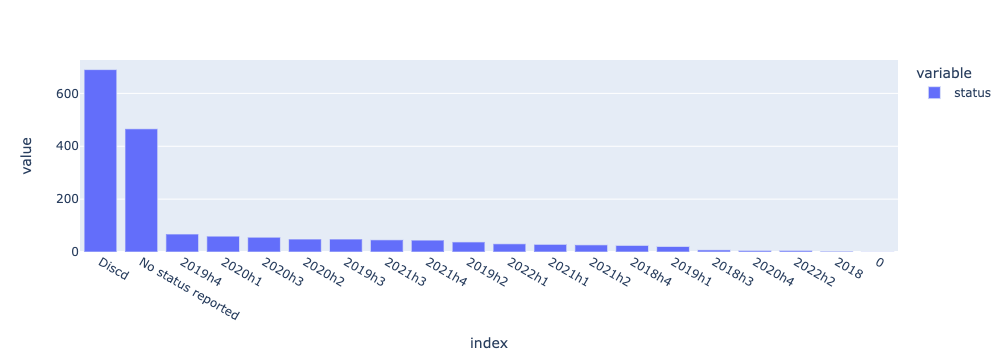

In [4]:
px.bar(df_models['status'].value_counts())

Most watches are discontinued or do not have a reported status. Each quarter usually has 25-50 models released.

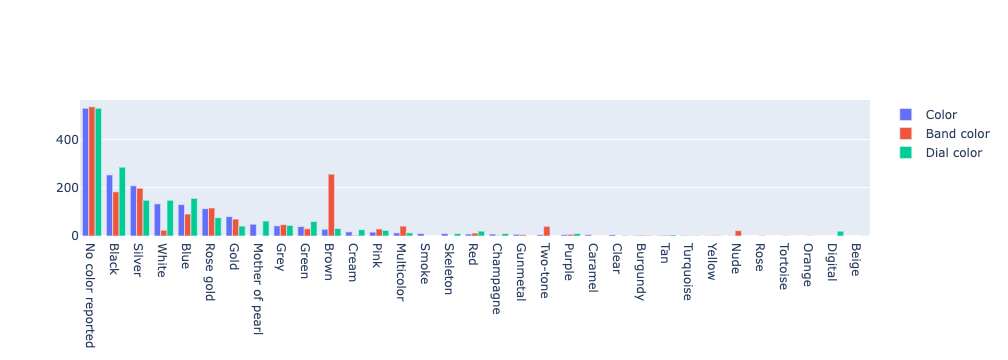

In [5]:
import plotly.graph_objects as go
colors = dict(df_models['color'].value_counts())
band_colors = dict(df_models['band_color'].value_counts())
dial_colors = dict(df_models['dial_color'].value_counts())

fig = go.Figure(data=[
    go.Bar(name='Color', x=list(colors.keys()), y=list(colors.values())),
    go.Bar(name='Band color', x=list(band_colors.keys()), y=list(band_colors.values())),
    go.Bar(name='Dial color', x=list(dial_colors.keys()), y=list(dial_colors.values()))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

Many watches don't have a color reported in all categories, but some of the most popular colors are popular across all features, with exception of white as the band color (less common) and brown as the band color (more common)

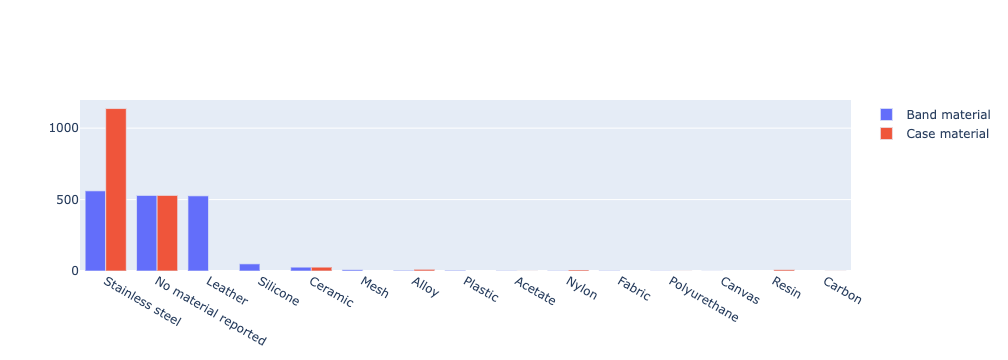

In [6]:
band_materials = dict(df_models['band_material'].value_counts())
case_materials = dict(df_models['case_material'].value_counts())

fig = go.Figure(data=[
    go.Bar(name='Band material', x=list(band_materials.keys()), y=list(band_materials.values())),
    go.Bar(name='Case material', x=list(case_materials.keys()), y=list(case_materials.values()))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

While stainless steel is an extremely common material for cases, it is rivaled by leather for bands. The rest of the materials are very uncommon compared to those two options.

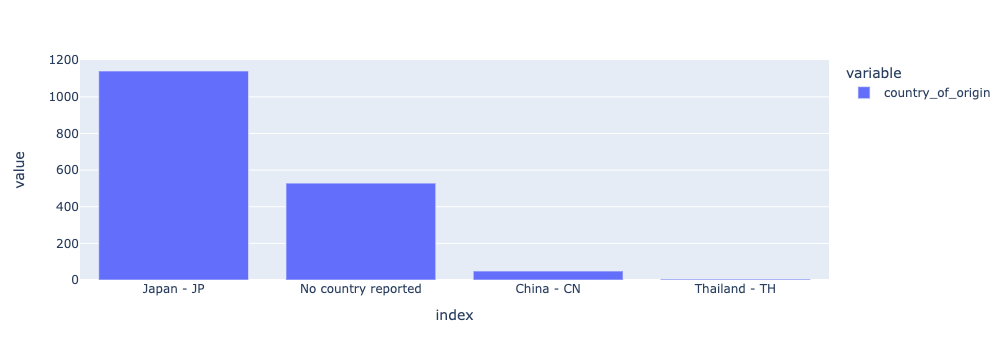

In [7]:
px.bar(df_models['country_of_origin'].value_counts())

Most watches manufactured in Japan, although there are some in other countries. I wonder if this has some luxury aspect to it.

In [8]:
df_models['warranty'].value_counts()

2 - Year International Limited Warranty    1192
No warranty reported                        529
1 - Year International Limited Warranty       3
Name: warranty, dtype: int64

Almost all watches where we know the warranty are 2 year, but some are 1 year. Could this influence purchases?

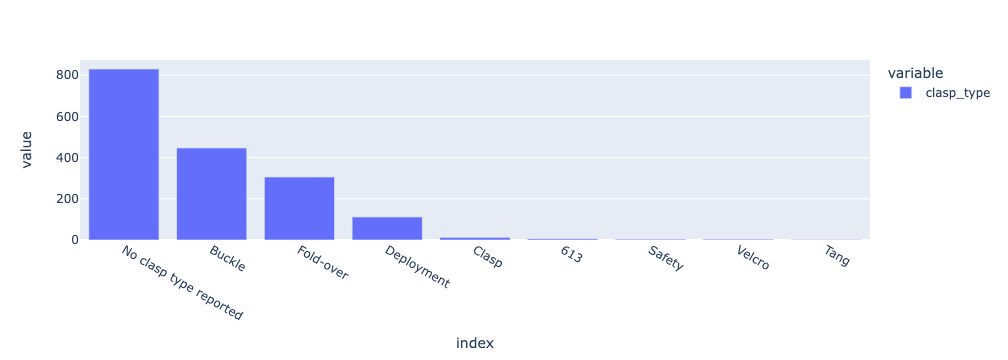

In [9]:
px.bar(df_models['clasp_type'].value_counts())

Several different types of clasps, although there is a top 3. Does this have an impact?

In [10]:
df_models.columns

Index(['style_id', 'status', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022-01', '2022-02', '2022-03', '2022-04', 'qt_sales_order',
       'total_sales_2022', 'qt_on_hand', 'monthly_avg_2022', 'wholesale_price',
       'color', 'country_of_origin', 'warranty', 'band_color', 'band_material',
       'case_material', 'clasp_type', 'dial_color', 'movement_type',
       'water_resistant', 'max_cart_qty', 'retail_price', 'collection',
       'gender', 'case_size'],
      dtype='object')

In [11]:
df_models.sort_values(by='total_sales_2022',ascending=False)

style_id              status  2015   2016   2017   2018   2019   2020  \
144      ES3203  No status reported  94.0  197.0  363.0  353.0  368.0  103.0   
145      ES3204  No status reported  70.0  204.0  276.0  415.0  305.0  168.0   
137      ES2811  No status reported  48.0  119.0  234.0  221.0  263.0   93.0   
693      ES4780              2020h3   0.0    0.0    0.0    0.0    0.0   35.0   
143      ES3202  No status reported  71.0  126.0  443.0  693.0  601.0  197.0   
...         ...                 ...   ...    ...    ...    ...    ...    ...   
532   ES4443SET              2018h4   0.0    0.0    0.0    0.0   50.0   52.0   
531      ES4442               Discd   0.0    0.0    0.0    0.0   40.0    0.0   
530      ES4441               Discd   0.0    0.0    0.0    0.0   81.0    0.0   
529      ES4440               Discd   0.0    0.0    0.0    0.0   98.0    2.0   
1723     ME3220  No status reported   0.0    0.0    0.0    0.0    0.0    0.0   

       2021  2022-01  ...    case_material              clasp_type  \
144   260.0     29.0  ...  Stainless steel  No clasp type reported   
145   166.0     24.0  ...  Stainless steel  No clasp type reported   
137   225.0     31.0  ...  Stainless steel  No clasp type reported   
693   162.0     39.0  ...  Stainless steel              Deployment   
143   197.0     27.0  ...  Stainless steel  No clasp type reported   
...     ...      ...  ...              ...                     ...   
532    17.0      0.0  ...  Stainless steel               Fold-over   
531     0.0      0.0  ...  Stainless steel               Fold-over   
530    10.0      0.0  ...  Stainless steel               Fold-over   
529    20.0      0.0  ...  Stainless steel               Fold-over   
1723    0.0      0.0  ...  Stainless steel               Fold-over   

           dial_color  movement_type     water_resistant  max_cart_qty  \
144              Gold         Quartz  50m - 160ft - 5atm       10000.0   
145             White         Quartz  50m - 160ft - 5atm       10000.0   
137              Gold         Quartz  50m - 160ft - 5atm       10000.0   
693              Gold         Quartz  50m - 160ft - 5atm       10000.0   
143             White         Quartz  50m - 160ft - 5atm       10000.0   
...               ...            ...                 ...           ...   
532   Mother of pearl         Quartz  30m - 100ft - 3atm       10000.0   
531             Black         Quartz  50m - 160ft - 5atm       10000.0   
530         Rose gold         Quartz  50m - 160ft - 5atm       10000.0   
529            Silver         Quartz  50m - 160ft - 5atm       10000.0   
1723             Blue      Automatic  50m - 160ft - 5atm         100.0   

      retail_price  collection  gender case_size  
144          150.0       Riley  Ladies      38.0  
145          140.0       Riley  Ladies      38.0  
137          150.0       Riley  Ladies      38.0  
693          150.0       Sadie  Ladies      38.0  
143          130.0       Riley  Ladies      38.0  
...            ...         ...     ...       ...  
532          139.0      Carlie  Ladies      28.0  
531          139.0      Carlie  Ladies      34.0  
530          135.0      Carlie  Ladies      35.0  
529          119.0      Carlie  Ladies      35.0  
1723         260.0     Everett    Mens      42.0  

[1724 rows x 33 columns]

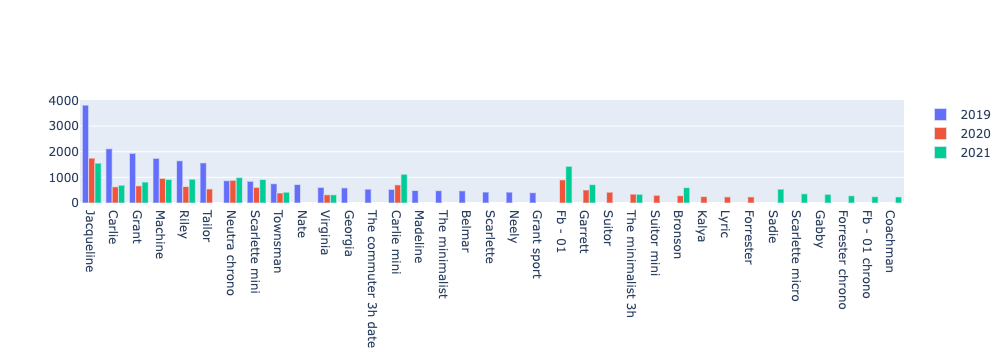

In [12]:
import plotly.graph_objects as go
top_collections_2019 = dict(df_models.groupby(by = 'collection')['2019'].sum().sort_values(ascending=False)[0:20])
top_collections_2020 = dict(df_models.groupby(by = 'collection')['2020'].sum().sort_values(ascending=False)[0:20])
top_collections_2021 = dict(df_models.groupby(by = 'collection')['2021'].sum().sort_values(ascending=False)[0:20])

fig = go.Figure(data=[
    go.Bar(name='2019', x=list(top_collections_2019.keys()), y=list(top_collections_2019.values())),
    go.Bar(name='2020', x=list(top_collections_2020.keys()), y=list(top_collections_2020.values())),
    go.Bar(name='2021', x=list(top_collections_2021.keys()), y=list(top_collections_2021.values()))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

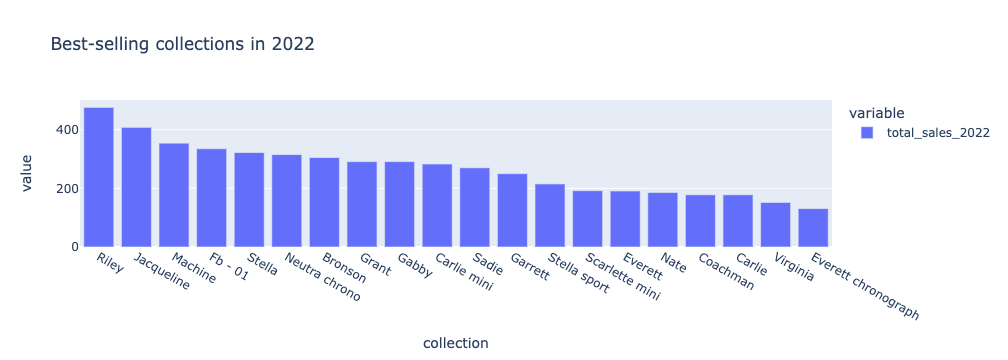

In [13]:
px.bar(df_models.groupby(by = 'collection')['total_sales_2022'].sum().sort_values(ascending=False)[0:20],title='Best-selling collections in 2022')

It seems that watch sales were much greater in 2019 than in 2021 or 2022. Some watches gained in popularity however. Let's explore this further.

In [14]:
df_models.columns

Index(['style_id', 'status', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022-01', '2022-02', '2022-03', '2022-04', 'qt_sales_order',
       'total_sales_2022', 'qt_on_hand', 'monthly_avg_2022', 'wholesale_price',
       'color', 'country_of_origin', 'warranty', 'band_color', 'band_material',
       'case_material', 'clasp_type', 'dial_color', 'movement_type',
       'water_resistant', 'max_cart_qty', 'retail_price', 'collection',
       'gender', 'case_size'],
      dtype='object')

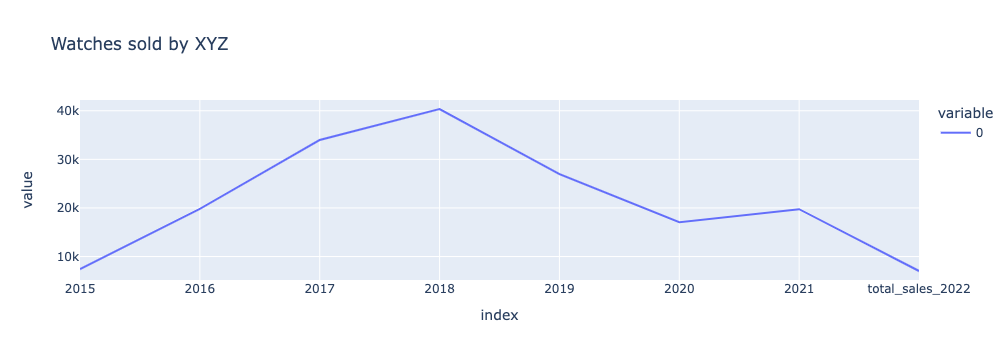

In [15]:
px.line(df_models.groupby(by = 'collection').sum().sum()[['2015', '2016', '2017', '2018', '2019', '2020',
       '2021','total_sales_2022']],title="Watches sold by XYZ")

In [16]:
for index in df_models.index:
    for year in ['2015', '2016', '2017', '2018', '2019', '2020', '2021','total_sales_2022']:
        df_models.loc[index,f'{year}_rev'] = df_models.loc[index,year] * df_models.loc[index,'wholesale_price']

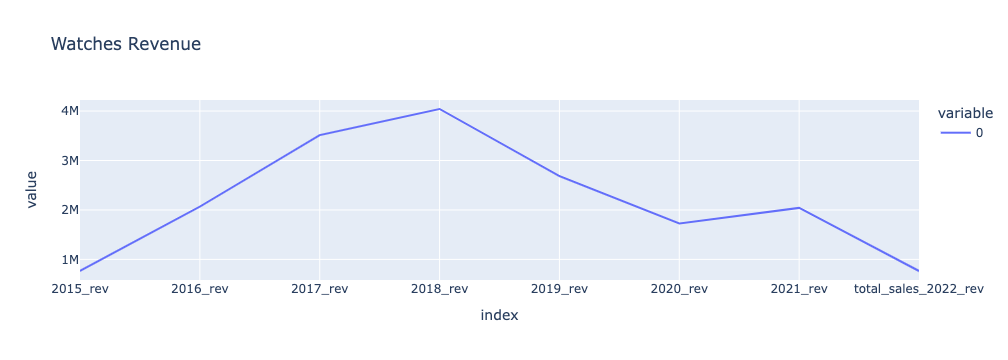

In [17]:
px.line(df_models.groupby(by = 'collection').sum().sum()[['2015_rev', '2016_rev', '2017_rev', '2018_rev',
       '2019_rev', '2020_rev', '2021_rev', 'total_sales_2022_rev']],title="Watches Revenue")

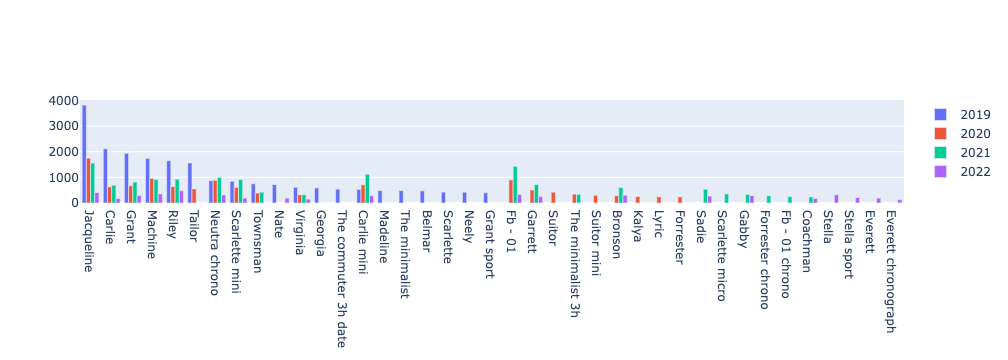

In [18]:
import plotly.graph_objects as go
top_models_2019 = dict(df_models.groupby(by = 'collection')['2019'].sum().sort_values(ascending=False)[0:20])
top_models_2020 = dict(df_models.groupby(by = 'collection')['2020'].sum().sort_values(ascending=False)[0:20])
top_models_2021 = dict(df_models.groupby(by = 'collection')['2021'].sum().sort_values(ascending=False)[0:20])
top_models_2022 = dict(df_models.groupby(by = 'collection')['total_sales_2022'].sum().sort_values(ascending=False)[0:20])

fig = go.Figure(data=[
    go.Bar(name='2019', x=list(top_models_2019.keys()), y=list(top_models_2019.values())),
    go.Bar(name='2020', x=list(top_models_2020.keys()), y=list(top_models_2020.values())),
    go.Bar(name='2021', x=list(top_models_2021.keys()), y=list(top_models_2021.values())),
    go.Bar(name='2022', x=list(top_models_2022.keys()), y=list(top_models_2022.values()))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

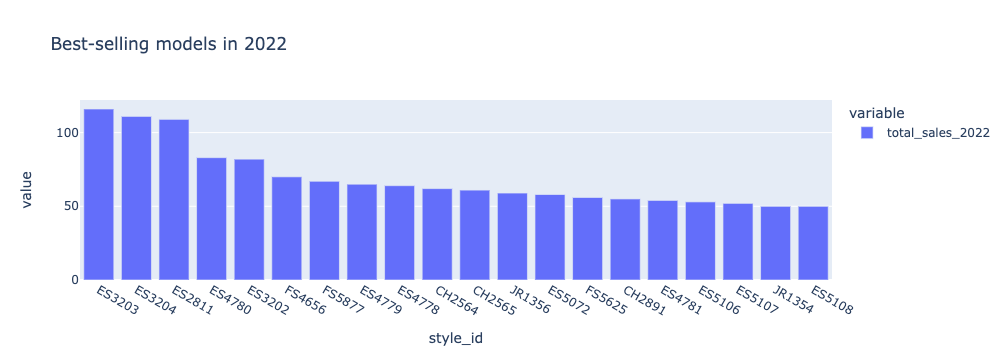

In [19]:
px.bar(df_models.groupby(by = 'style_id')['total_sales_2022'].sum().sort_values(ascending=False)[0:20],title='Best-selling models in 2022')

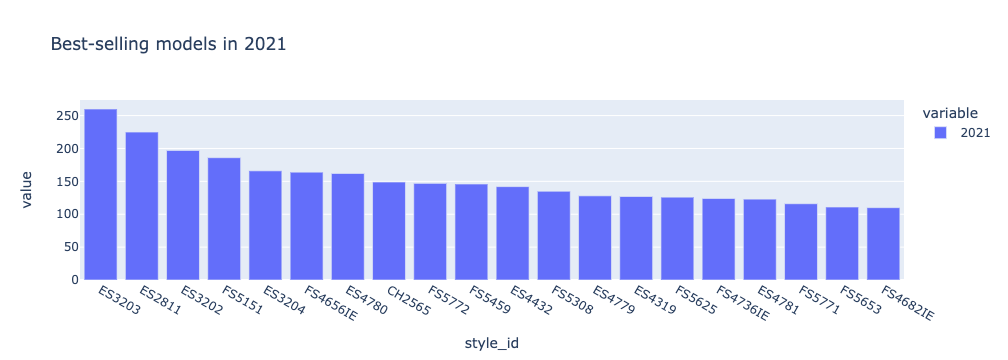

In [20]:
px.bar(df_models.groupby(by = 'style_id')['2021'].sum().sort_values(ascending=False)[0:20],title='Best-selling models in 2021')

In [21]:
df_models.columns

Index(['style_id', 'status', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022-01', '2022-02', '2022-03', '2022-04', 'qt_sales_order',
       'total_sales_2022', 'qt_on_hand', 'monthly_avg_2022', 'wholesale_price',
       'color', 'country_of_origin', 'warranty', 'band_color', 'band_material',
       'case_material', 'clasp_type', 'dial_color', 'movement_type',
       'water_resistant', 'max_cart_qty', 'retail_price', 'collection',
       'gender', 'case_size', '2015_rev', '2016_rev', '2017_rev', '2018_rev',
       '2019_rev', '2020_rev', '2021_rev', 'total_sales_2022_rev'],
      dtype='object')

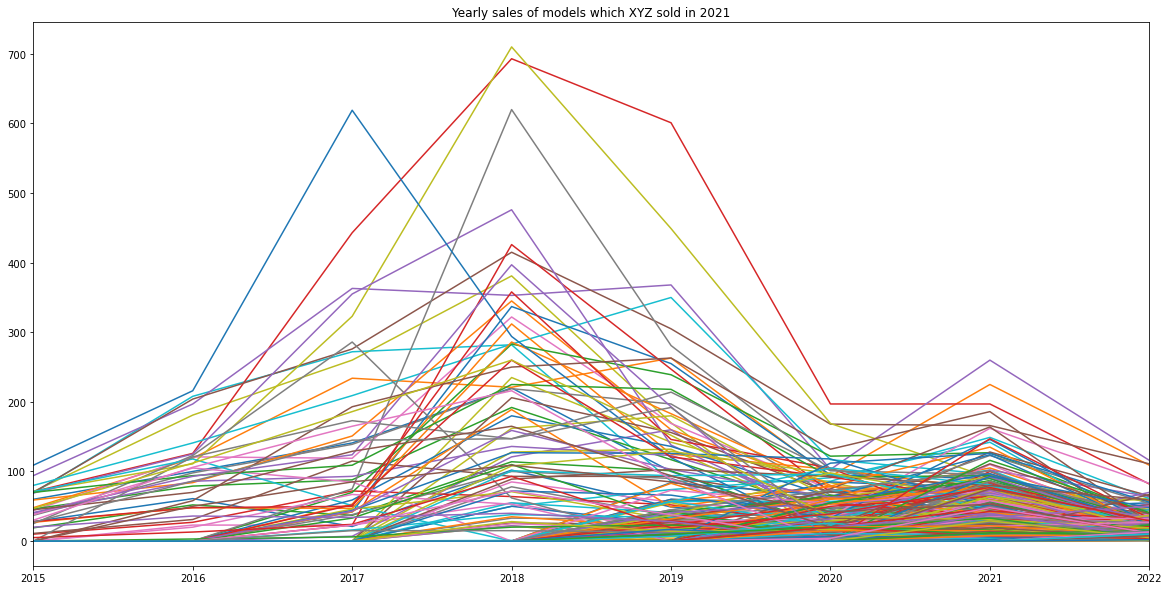

In [22]:
df_yearly_sales = df_models[['style_id','2015', '2016', '2017', '2018', '2019', '2020',
       '2021', 'total_sales_2022']].set_index('style_id')

df_yearly_sales.columns = pd.to_datetime(['2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'])

df_yearly_sales_sold_2021 = df_yearly_sales[df_yearly_sales['2022-01-01'] > 0].T

df_yearly_sales_sold_2021.plot(figsize = (20,10),legend=False,title='Yearly sales of models which XYZ sold in 2021');

It seems that most models that sold in 2021 sold less than 100 models. There are some exceptions, which are the bestsellers

<AxesSubplot:title={'center':'Yearly sales of collections which XYZ sold in 2021'}>

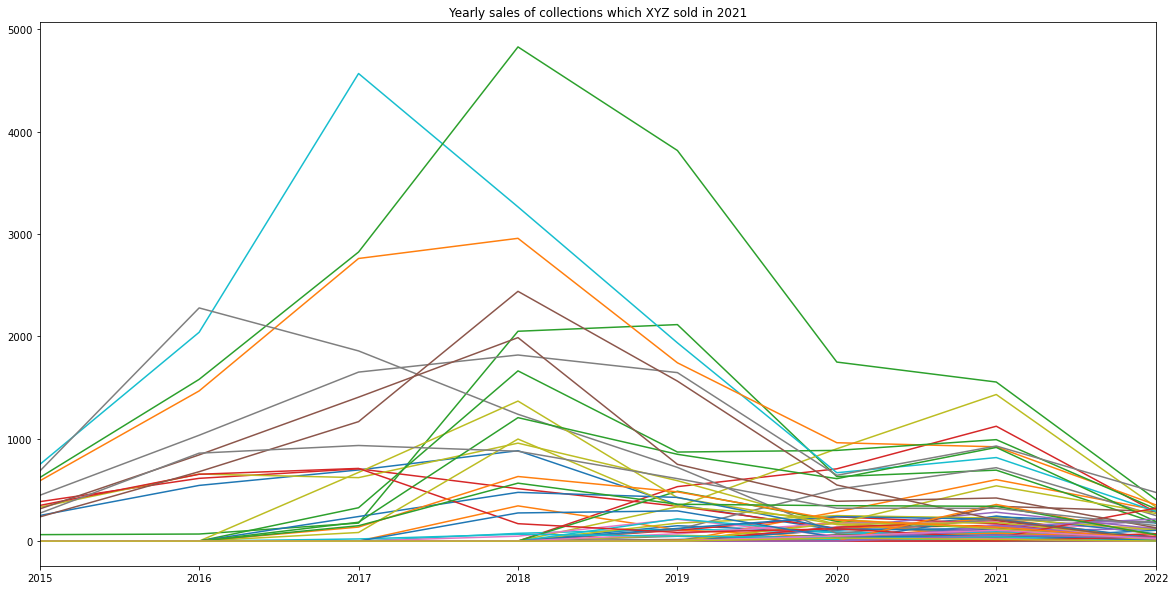

In [23]:
df_yearly_sales_collection = df_models[['collection','2015', '2016', '2017', '2018', '2019', '2020',
       '2021', 'total_sales_2022']].groupby('collection').sum()

df_yearly_sales_collection.columns = pd.to_datetime(['2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'])

df_yearly_sales_collection_sold_2021 = df_yearly_sales_collection[df_yearly_sales_collection['2022-01-01'] > 0].T

df_yearly_sales_collection_sold_2021.plot(figsize = (20,10),legend=False,title='Yearly sales of collections which XYZ sold in 2021')

Some collections are more successful than others, but the disparity has changed since 2018/2019

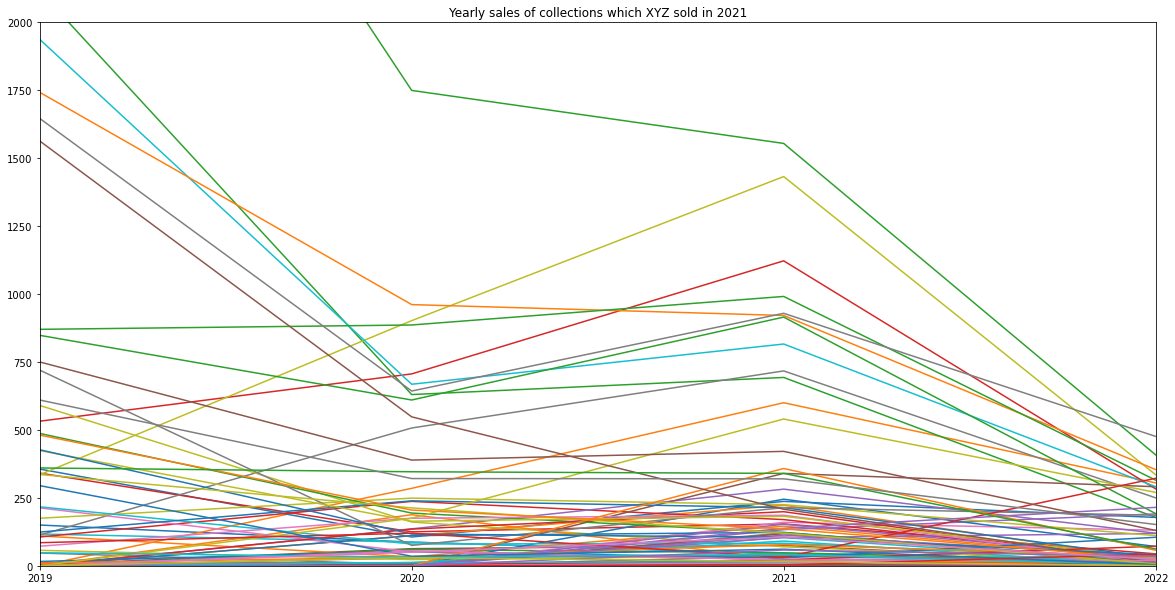

In [24]:
df_yearly_sales_collection = df_models[['collection','2019', '2020',
       '2021', 'total_sales_2022']].groupby('collection').sum()

df_yearly_sales_collection.columns = pd.to_datetime(['2019', '2020', '2021',
       '2022'])

df_yearly_sales_collection_sold_2021 = df_yearly_sales_collection[df_yearly_sales_collection['2022-01-01'] > 0].T

df_yearly_sales_collection_sold_2021.plot(figsize = (20,10),legend=False,title='Yearly sales of collections which XYZ sold in 2021',ylim=(0,2000));

In [25]:
df_models.columns

Index(['style_id', 'status', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022-01', '2022-02', '2022-03', '2022-04', 'qt_sales_order',
       'total_sales_2022', 'qt_on_hand', 'monthly_avg_2022', 'wholesale_price',
       'color', 'country_of_origin', 'warranty', 'band_color', 'band_material',
       'case_material', 'clasp_type', 'dial_color', 'movement_type',
       'water_resistant', 'max_cart_qty', 'retail_price', 'collection',
       'gender', 'case_size', '2015_rev', '2016_rev', '2017_rev', '2018_rev',
       '2019_rev', '2020_rev', '2021_rev', 'total_sales_2022_rev'],
      dtype='object')

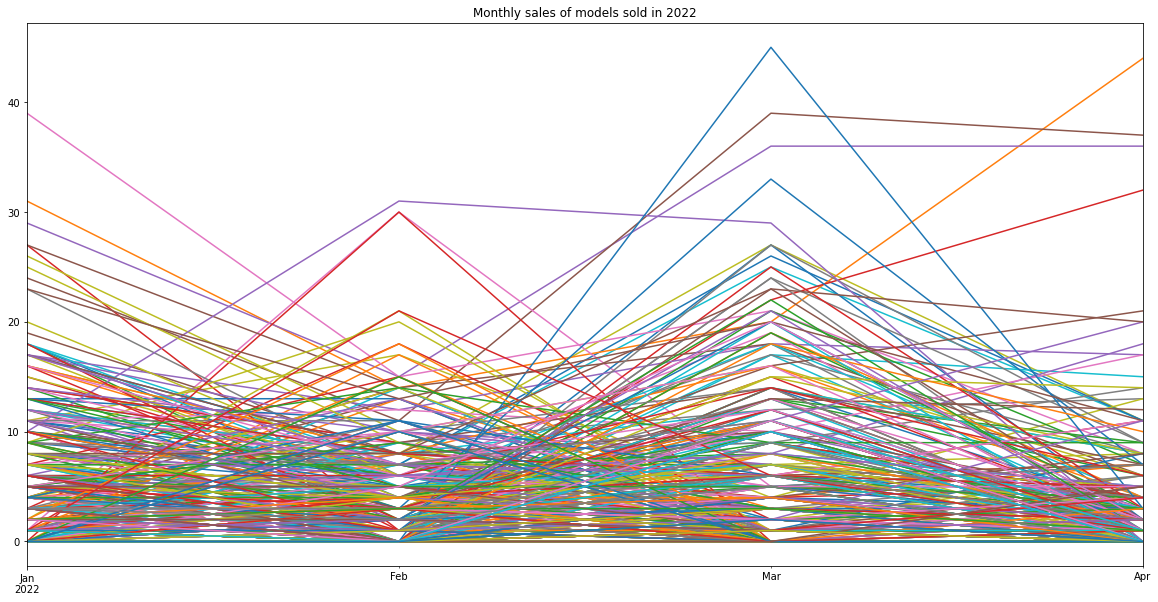

In [26]:
df_monthly_sales = df_models[['style_id','2022-01', '2022-02', '2022-03', '2022-04','total_sales_2022']].set_index('style_id')
df_monthly_sales = df_monthly_sales[df_monthly_sales['total_sales_2022'] > 0].drop(columns='total_sales_2022')
df_monthly_sales.columns = pd.to_datetime(df_monthly_sales.columns)
df_monthly_sales.T.plot(legend=False,title='Monthly sales of models sold in 2022',figsize=(20,10));

In [27]:
df_monthly_sales

2022-01-01  2022-02-01  2022-03-01  2022-04-01
style_id                                                
CE1107          11.0         6.0         5.0         7.0
CE1108           5.0         0.0         2.0         3.0
CE1110           8.0         3.0         7.0         3.0
CE1111           0.0         0.0         4.0         0.0
CE1112           8.0         3.0         7.0         1.0
...              ...         ...         ...         ...
ME3209           2.0         0.0        11.0         0.0
ME3210           3.0         2.0         5.0         0.0
ME3211           0.0         0.0         1.0         0.0
ME3212           0.0         0.0        10.0         0.0
ME3214           0.0         0.0         2.0         0.0

[441 rows x 4 columns]

<AxesSubplot:>

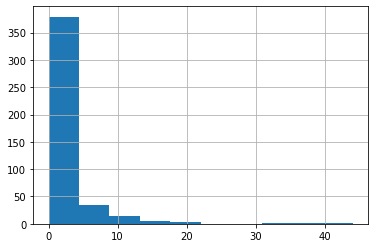

In [28]:
df_monthly_sales['2022-04-01'].hist()

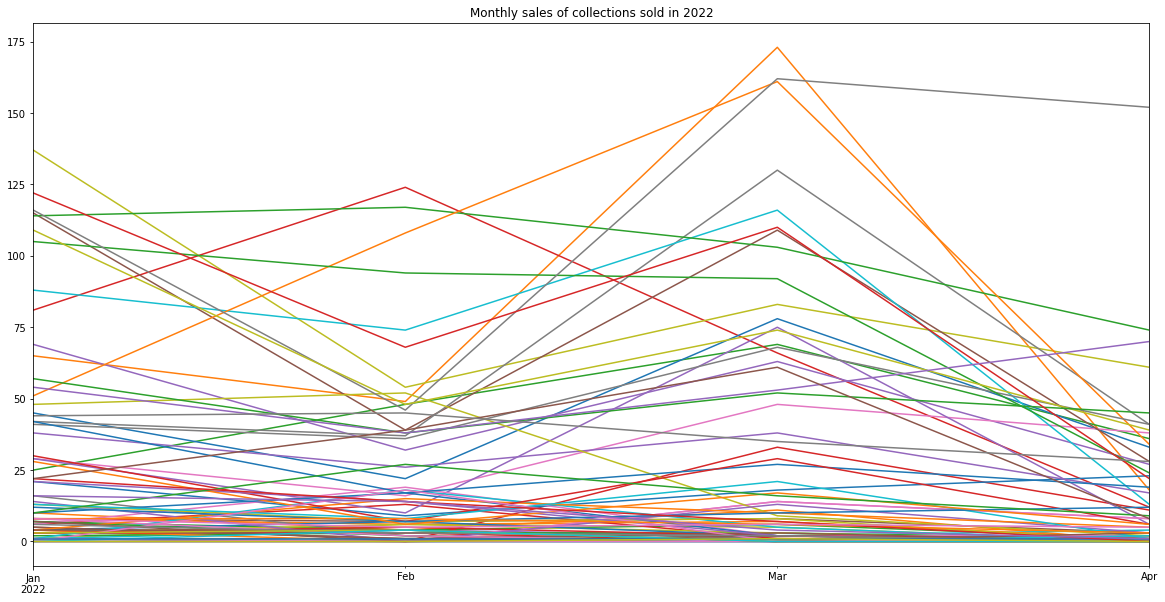

In [29]:
df_monthly_sales_collection = df_models[['collection','2022-01', '2022-02', '2022-03', '2022-04','total_sales_2022']].groupby('collection').sum()

df_monthly_sales_collection = df_monthly_sales_collection[df_monthly_sales_collection['total_sales_2022'] > 0].drop(columns='total_sales_2022')
df_monthly_sales_collection.columns = pd.to_datetime(df_monthly_sales_collection.columns)
df_monthly_sales_collection.T.plot(legend=False,title='Monthly sales of collections sold in 2022',figsize=(20,10));

## Explore Time Series data for the quarterly sales

In [30]:
df_quarterly

Unnamed: 0 style_id              status  2015   2016   2017   2018  \
0              0   AM4141  No status reported  54.0  135.0  204.0  201.0   
1              1   AM4183               Discd  70.0  170.0  174.0  131.0   
2              2   AM4481  No status reported  72.0  133.0  251.0   33.0   
3              3   AM4482               Discd   0.0  164.0  138.0    0.0   
4              4   AM4483  No status reported  49.0  106.0  147.0    0.0   
...          ...      ...                 ...   ...    ...    ...    ...   
1719        1719   ME3214              2022h1   0.0    0.0    0.0    0.0   
1720        1720   ME3217  No status reported   0.0    0.0    0.0    0.0   
1721        1721   ME3218  No status reported   0.0    0.0    0.0    0.0   
1722        1722   ME3219  No status reported   0.0    0.0    0.0    0.0   
1723        1723   ME3220  No status reported   0.0    0.0    0.0    0.0   

       2019  2020  2021  ...  2019Q4  2020Q1  2020Q2  2020Q3  2020Q4  2021Q1  \
0     142.0   0.0   0.0  ...   47.33     0.0     0.0     0.0     0.0     0.0   
1       0.0   0.0   0.0  ...    0.00     0.0     0.0     0.0     0.0     0.0   
2       0.0   0.0   0.0  ...    0.00     0.0     0.0     0.0     0.0     0.0   
3       1.0   0.0   0.0  ...    0.00     0.0     0.0     0.0     0.0     0.0   
4       0.0   0.0   0.0  ...    0.00     0.0     0.0     0.0     0.0     0.0   
...     ...   ...   ...  ...     ...     ...     ...     ...     ...     ...   
1719    0.0   0.0   0.0  ...    0.00     0.0     0.0     0.0     0.0     0.0   
1720    0.0   0.0   0.0  ...    0.00     0.0     0.0     0.0     0.0     0.0   
1721    0.0   0.0   0.0  ...    0.00     0.0     0.0     0.0     0.0     0.0   
1722    0.0   0.0   0.0  ...    0.00     0.0     0.0     0.0     0.0     0.0   
1723    0.0   0.0   0.0  ...    0.00     0.0     0.0     0.0     0.0     0.0   

      2021Q2  2021Q3  2021Q4 2022Q1  
0        0.0     0.0     0.0    0.0  
1        0.0     0.0     0.0    0.0  
2        0.0     0.0     0.0    0.0  
3        0.0     0.0     0.0    0.0  
4        0.0     0.0     0.0    0.0  
...      ...     ...     ...    ...  
1719     0.0     0.0     0.0    2.0  
1720     0.0     0.0     0.0    0.0  
1721     0.0     0.0     0.0    0.0  
1722     0.0     0.0     0.0    0.0  
1723     0.0     0.0     0.0    0.0  

[1724 rows x 59 columns]

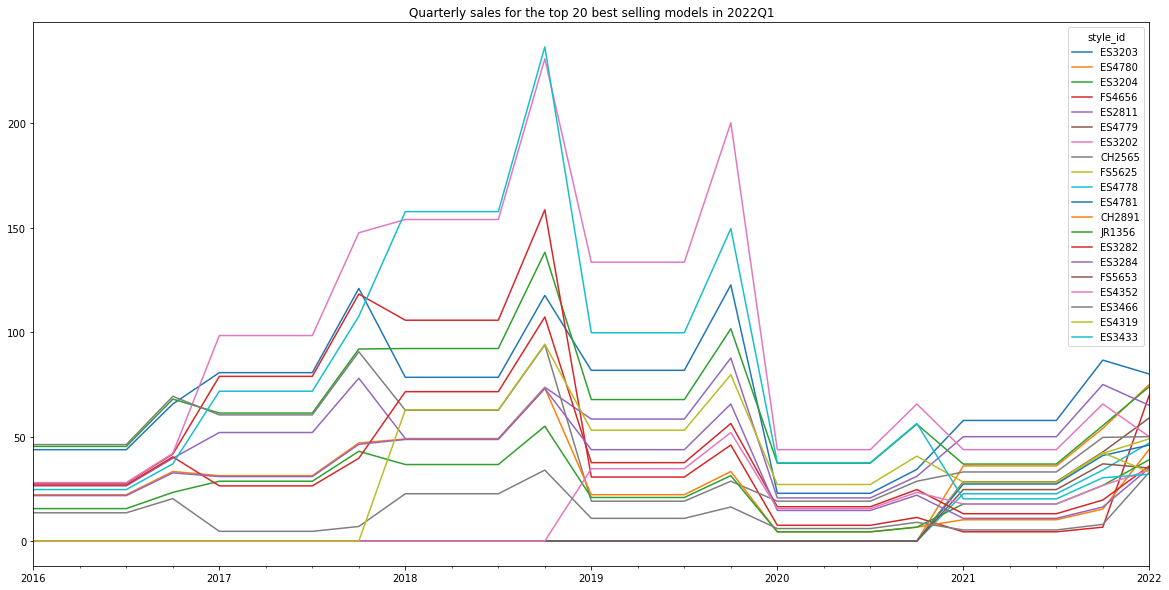

In [31]:
df_quarterly_models = df_quarterly[['style_id','2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1',
       '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4',
       '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3',
       '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4','2022Q1']].set_index('style_id')
df_quarterly_models = df_quarterly_models[df_quarterly_models['2021Q4'] > 0]
df_quarterly_models.sort_values(by = '2022Q1', ascending=False, inplace=True)
df_quarterly_models.columns = pd.to_datetime(df_quarterly_models.columns)

df_quarterly_models.head(20).T.plot(figsize=(20,10),title='Quarterly sales for the top 20 best selling models in 2022Q1');

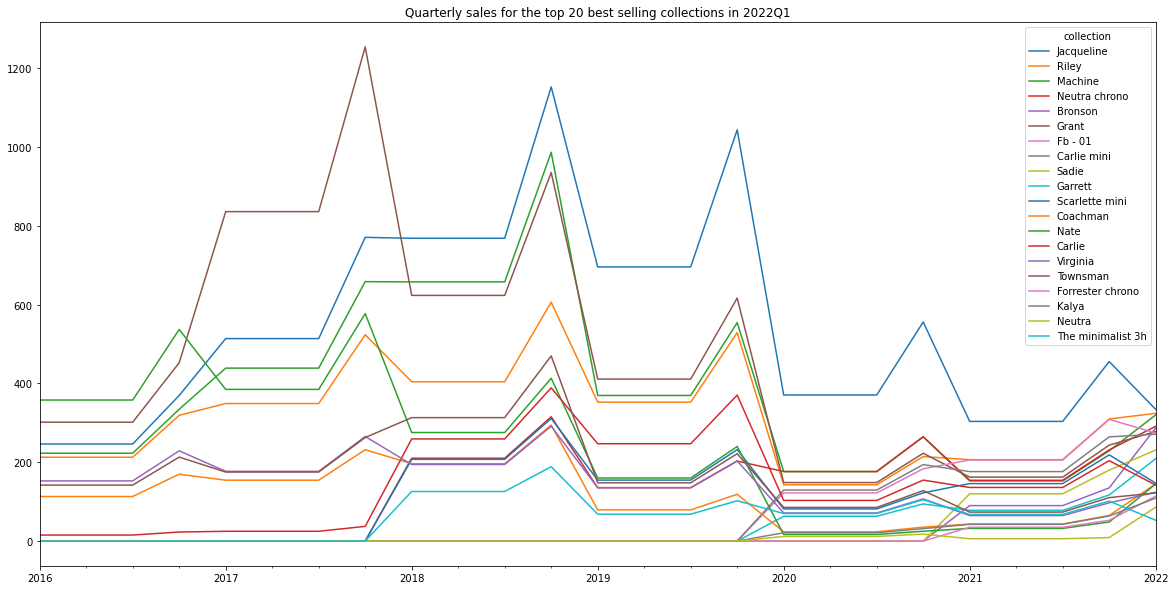

In [32]:
df_quarterly_collections = df_quarterly[['collection','2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1',
       '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4',
       '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3',
       '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4','2022Q1']].groupby('collection').sum()
df_quarterly_collections = df_quarterly_collections[df_quarterly_collections['2021Q4'] > 0]
df_quarterly_collections.sort_values(by = '2022Q1', ascending=False, inplace=True)
df_quarterly_collections.columns = pd.to_datetime(df_quarterly_collections.columns)

df_quarterly_collections.head(20).T.plot(figsize=(20,10),title='Quarterly sales for the top 20 best selling collections in 2022Q1');